In [1]:
import pandas as pd
import numpy as np
import os
from lib.wc import wc
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aliciahorsch/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aliciahorsch/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
desc = pd.read_csv('monster_desc.csv')
gender = pd.read_csv('monster_gen.csv')

In [3]:
# Exclude titles and non-monsters 
desc = desc[desc['key'].str.contains("descriptionKey")]
desc = desc[desc['key'].str.contains("monster")]

In [4]:
#Merge descriptions with gender
d = (desc
     .assign(
        name=lambda x: wc.get_character_name(x['key'])
    )
)

g = (gender
     .assign(
        name= lambda x: x['Name'].str.lower(),
        Gender= lambda x: x['Gender'].str.lower())
)
df = pd.merge(d,g, on = 'name')

In [5]:
df.head()

,key,dev_en,name,Name,Gender
0,monster_Arnu_descriptionKey,The poisonous sweat that Arnu produces causes ...,arnu,Arnu,male
1,monster_Aurinia_descriptionKey,Aurinia belongs to a dynasty of druids. She is...,aurinia,Aurinia,female
2,monster_Beefcake_descriptionKey,The rocks are alive! The Beefcake is the most ...,beefcake,Beefcake,neutral
3,monster_Blesstle_descriptionKey,"The Blesstle, the Water Realm's ambassadors of...",blesstle,Blesstle,neutral
4,monster_Bloomskips_descriptionKey,Bloomskips feel at home when popping out of da...,bloomskips,Bloomskips,male


In [6]:
props = df['Gender'].value_counts()
props

male       356
neutral    139
female      98
Name: Gender, dtype: int64

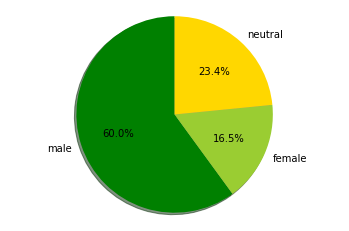

In [7]:
# Pie chart: Player assignment
labels = 'male', 'female', 'neutral'
sizes = [props[0], props[2], props[1]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, 
        colors = ['#008000','#9ACD32', '#FFD700'])
ax1.axis('equal')  
plt.show()

In [8]:
male = wc.get_df_gender(df, 'male')
female = wc.get_df_gender(df, 'female')
neutral = wc.get_df_gender(df, 'neutral')

In [9]:
#List
male_tokens = wc.clean_and_tokenize_description(male)
female_tokens = wc.clean_and_tokenize_description(female)
neutral_tokens = wc.clean_and_tokenize_description(neutral)

In [10]:
m_adj = wc.create_adjective_list(male_tokens)
f_adj = wc.create_adjective_list(female_tokens)
n_adj = wc.create_adjective_list(neutral_tokens)


KeyboardInterrupt



In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(m_adj)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(f_adj)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(n_adj)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
m = wc.get_most_common_words(m_adj, 40)
f = wc.get_most_common_words(f_adj, 40)
n = wc.get_most_common_words(n_adj, 40)

In [20]:
rl = wc.create_removelist(m, f, n)
m_adj_red, f_adj_red, n_adj_red = wc.remove_shared_adjectives(m_adj, f_adj, n_adj, rl)

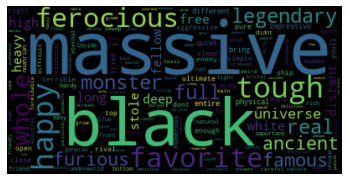

In [29]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(m_adj_red)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

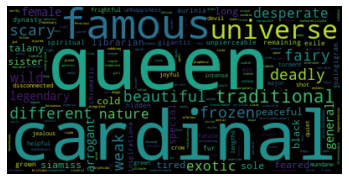

In [30]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(f_adj_red)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

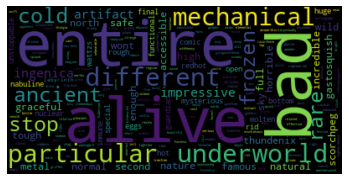

In [31]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(n_adj_red)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('wc6.png')